In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import folium

In [2]:
data = pd.read_csv("crimeDataEDA.csv")

#### Head of the data

In [3]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,STREET,Lat,Long,NAME
0,I182070777,619,Larceny,C11,388,23-08-2018 13:34,ADAMS ST,42.272306,-71.067214,LARCENY OTHER $200 & OVER
1,I182070596,619,Larceny,C6,216,02-09-2018 17:29,F ST,42.333829,-71.051287,LARCENY OTHER $200 & OVER
2,I182070496,619,Larceny,B2,318,02-09-2018 00:00,SEAVER ST,42.308789,-71.090556,LARCENY OTHER $200 & OVER
3,I182070346,619,Larceny,B2,587,31-08-2018 19:00,BURNEY ST,42.331887,-71.099544,LARCENY OTHER $200 & OVER
4,I182070233,619,Larceny,B3,416,31-08-2018 21:38,FAIRMOUNT ST,42.281049,-71.072064,LARCENY OTHER $200 & OVER


#### Converting the occoured_on_data column type to date type

In [4]:
# converting the occoured_on_data column type to date type
data["OCCURRED_ON_DATE"] = pd.to_datetime(data["OCCURRED_ON_DATE"],format="%d-%m-%Y %H:%M")

In [5]:
data.dtypes

INCIDENT_NUMBER               object
OFFENSE_CODE                   int64
OFFENSE_CODE_GROUP            object
DISTRICT                      object
REPORTING_AREA                 int64
OCCURRED_ON_DATE      datetime64[ns]
STREET                        object
Lat                          float64
Long                         float64
NAME                          object
dtype: object

#### Highest crime Type committed in the districts 

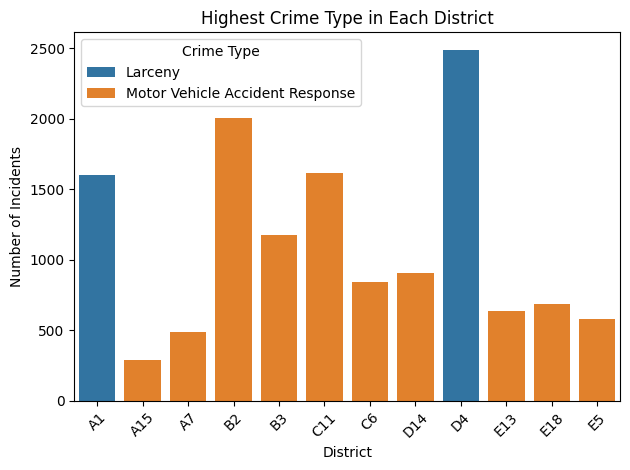

In [6]:
# Highest crime type committed on that district 
count_crime_InDistrict =  data.groupby(["DISTRICT","OFFENSE_CODE_GROUP"]).size().reset_index(name="Count").sort_values(["DISTRICT","Count"],ascending=[True,False])
highest_crime_InDistrict = count_crime_InDistrict.groupby("DISTRICT").first().reset_index()
sns.barplot(data=highest_crime_InDistrict,x="DISTRICT",y="Count",hue="OFFENSE_CODE_GROUP") 
plt.title("Highest Crime Type in Each District")
plt.xlabel("District")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()

#### Highest crime Name committed in the districts

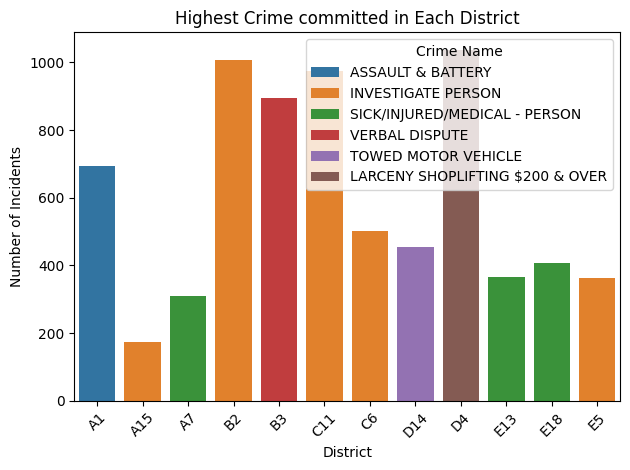

In [7]:
# Highest crime committed on that district 
count_crime_InDistrict =  data.groupby(["DISTRICT","NAME"]).size().reset_index(name="Count").sort_values(["DISTRICT","Count"],ascending=[True,False])
highest_crime_InDistrict = count_crime_InDistrict.groupby("DISTRICT").first().reset_index()
sns.barplot(data=highest_crime_InDistrict,x="DISTRICT",y="Count",hue="NAME") 
plt.title("Highest Crime committed in Each District")
plt.xlabel("District")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.legend(title="Crime Name")
plt.tight_layout()
plt.show()

#### Total No of crimes committed in each district 

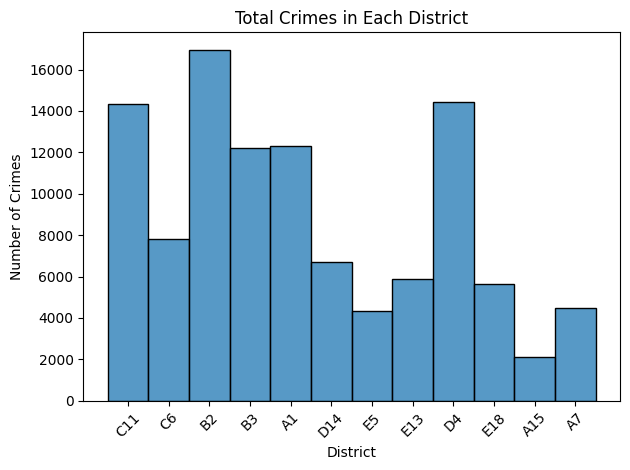

In [8]:
# Total No of crimes committed in each district 
sns.histplot(data=data,x="DISTRICT")
plt.title("Total Crimes in Each District")
plt.xlabel("District")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Total No of crimes % in each District 

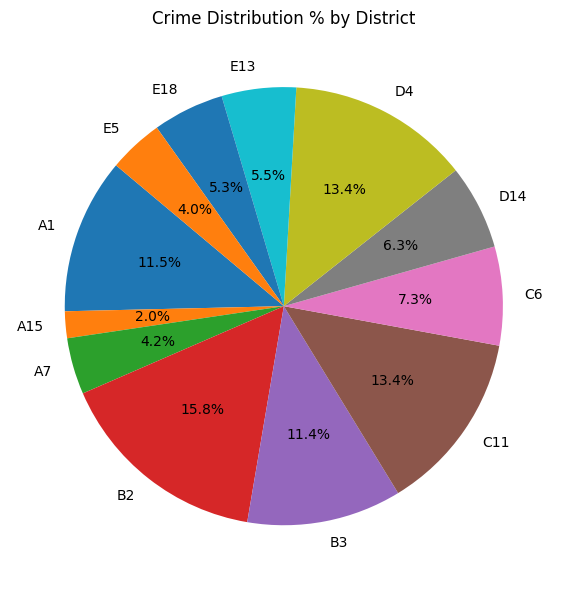

In [9]:
# Total No of crimes % in each District 
total_crimes_InDistrict = data.groupby("DISTRICT").size()
plt.figure(figsize=(10, 6))
plt.pie(total_crimes_InDistrict, labels=total_crimes_InDistrict.index, autopct='%1.1f%%', startangle=140)
plt.title("Crime Distribution % by District")
plt.tight_layout()
plt.show()

#### Highest reportarea which have highest crimes in every districts

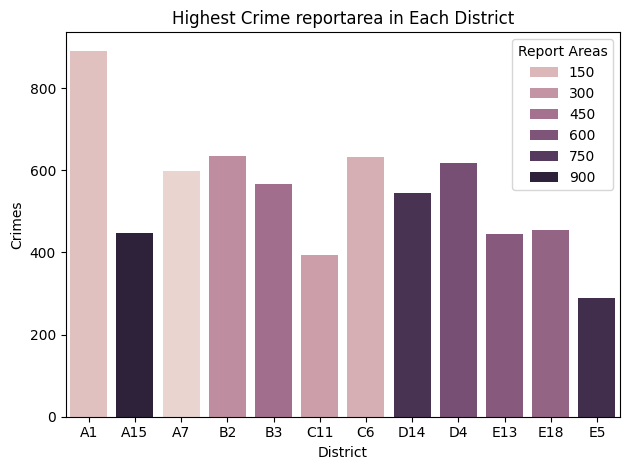

In [10]:
crimereportDistrict = data.groupby(["DISTRICT","REPORTING_AREA"]).size().reset_index(name = "Count").sort_values(["DISTRICT","Count"],ascending=[False,False])
crimereportDistrict = crimereportDistrict.groupby("DISTRICT").first().reset_index()

sns.barplot(data=crimereportDistrict,x="DISTRICT",y="Count",hue="REPORTING_AREA") 
plt.title("Highest Crime reportarea in Each District")
plt.xlabel("District")
plt.ylabel("Crimes")
plt.legend(title="Report Areas")
plt.tight_layout()
plt.show()

#### Lowest reportarea which have lowest crimes in every districts

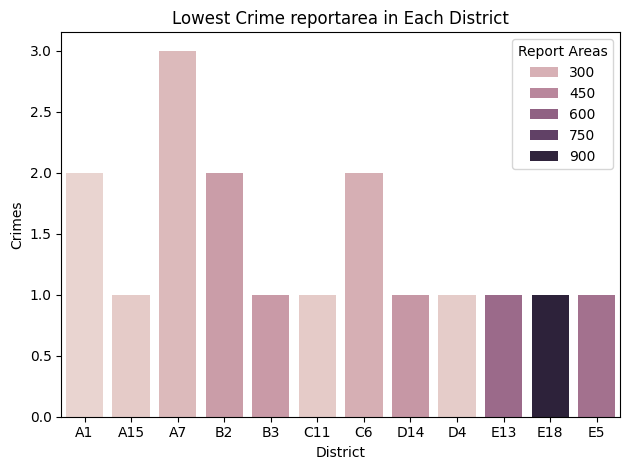

In [11]:
crimereportDistrict = data.groupby(["DISTRICT","REPORTING_AREA"]).size().reset_index(name = "Count").sort_values(["DISTRICT","Count"],ascending=[False,False])
crimereportDistrict = crimereportDistrict.groupby("DISTRICT").last().reset_index()

sns.barplot(data=crimereportDistrict,x="DISTRICT",y="Count",hue="REPORTING_AREA") 
plt.title("Lowest Crime reportarea in Each District")
plt.xlabel("District")
plt.ylabel("Crimes")
plt.legend(title="Report Areas")
plt.tight_layout()
plt.show()

#### Highest Crime committed in Street Of Highest Report Areas in District 

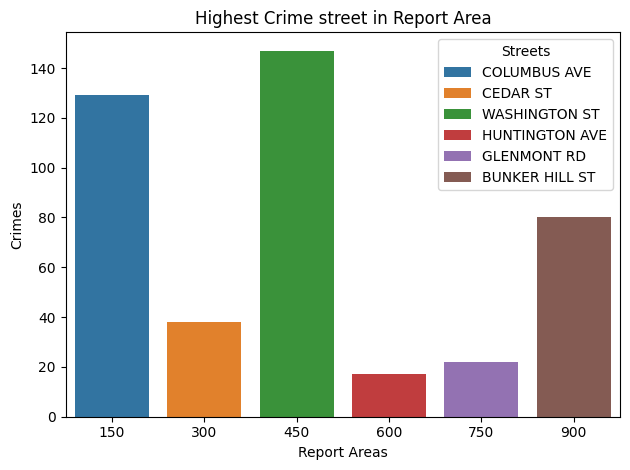

In [12]:
crimereportstreet = data.groupby(["REPORTING_AREA","STREET"]).size().reset_index(name = "Count").sort_values(["REPORTING_AREA","Count"],ascending=[False,False])
crimereportstreet = crimereportstreet[crimereportstreet["REPORTING_AREA"].isin([150,300,450,600,750,900])].groupby("REPORTING_AREA").first().reset_index()
sns.barplot(data=crimereportstreet,x="REPORTING_AREA",y="Count",hue="STREET") 
plt.title("Highest Crime street in Report Area")
plt.xlabel("Report Areas")
plt.ylabel("Crimes")
plt.legend(title="Streets")
plt.tight_layout()
plt.show()

#### Highest Crime Type in Each ReportArea (top 20)

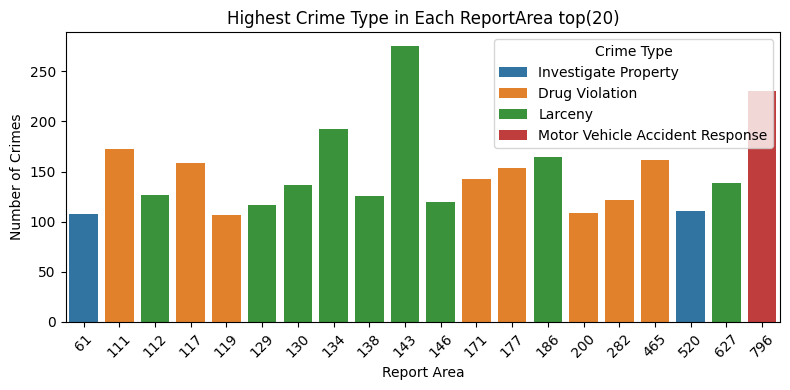

In [13]:
# Highest Crime Type in Each ReportArea
higest_crimetype_InReportarea =  data.groupby(["REPORTING_AREA","OFFENSE_CODE_GROUP"]).size().reset_index(name="Count").sort_values(["REPORTING_AREA","Count"],ascending=[True,False])
highest_crimeType = higest_crimetype_InReportarea.groupby("REPORTING_AREA").first().reset_index().sort_values("Count",ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(data=highest_crimeType.head(20),x="REPORTING_AREA",y="Count",hue="OFFENSE_CODE_GROUP") 
plt.title("Highest Crime Type in Each ReportArea top(20)")
plt.xlabel("Report Area")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()

#### Highest Crime in Each ReportArea (top 20)

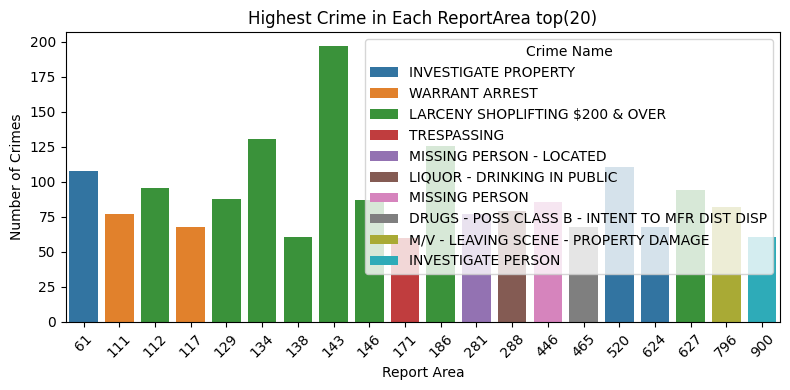

In [14]:
# Highest Crime Type in Each ReportArea
higest_crimetype_InReportarea =  data.groupby(["REPORTING_AREA","NAME"]).size().reset_index(name="Count").sort_values(["REPORTING_AREA","Count"],ascending=[True,False])
highest_crimeType = higest_crimetype_InReportarea.groupby("REPORTING_AREA").first().reset_index().sort_values("Count",ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(data=highest_crimeType.head(20),x="REPORTING_AREA",y="Count",hue="NAME") 
plt.title("Highest Crime in Each ReportArea top(20)")
plt.xlabel("Report Area")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.legend(title="Crime Name")
plt.tight_layout()
plt.show()

#### Total No of crimes committed in each report_area (Top 20)

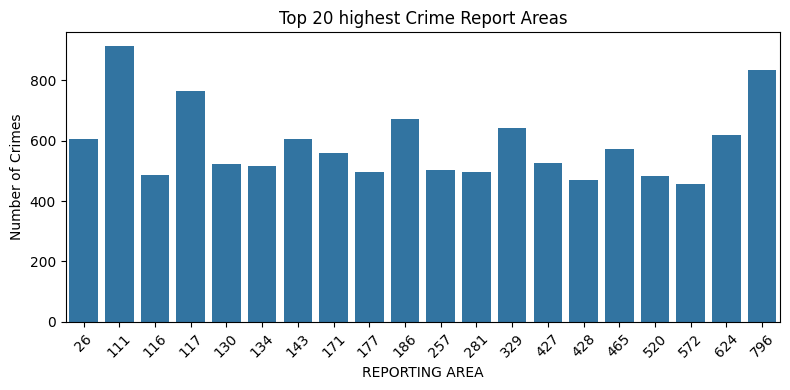

In [15]:
# Total No of crimes committed in each report_area 
total_crimes_InReportarea = data.groupby("REPORTING_AREA").size().reset_index(name="Count").sort_values("Count",ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(data=total_crimes_InReportarea.head(20),x="REPORTING_AREA",y="Count")
plt.title("Top 20 highest Crime Report Areas")
plt.xlabel("REPORTING AREA")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Crimes comitted in Reporting Area in Every Month(Top 20 Areas)

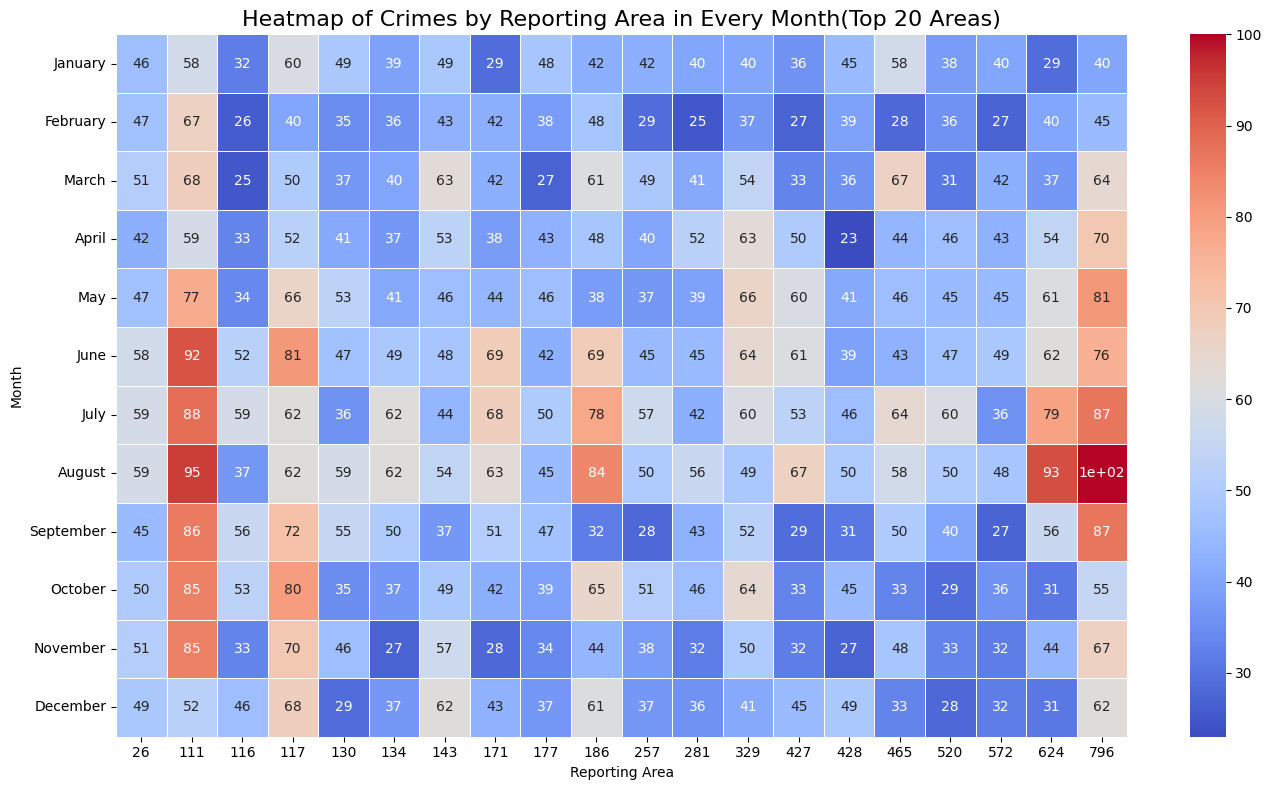

In [16]:
data["Month"] = data["OCCURRED_ON_DATE"].dt.month_name()
total_crimes_InReportareaInMonth = data.groupby(["REPORTING_AREA","Month"]).size().reset_index(name="Count")
total_crimes_InReportareaInMonth=total_crimes_InReportareaInMonth[total_crimes_InReportareaInMonth["REPORTING_AREA"].isin(total_crimes_InReportarea["REPORTING_AREA"].head(20))]

total_crimes_InReportareaInMonth['Month'] = pd.Categorical(total_crimes_InReportareaInMonth['Month'], categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)


total_crimes_InReportareaInMonth = total_crimes_InReportareaInMonth.pivot(index="Month",columns="REPORTING_AREA",values="Count")

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(total_crimes_InReportareaInMonth,annot=True , cmap="coolwarm", linewidths=.5)
plt.title('Heatmap of Crimes by Reporting Area in Every Month(Top 20 Areas)', fontsize=16)
plt.xlabel('Reporting Area')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

#### Highest Crime Type in Each Street

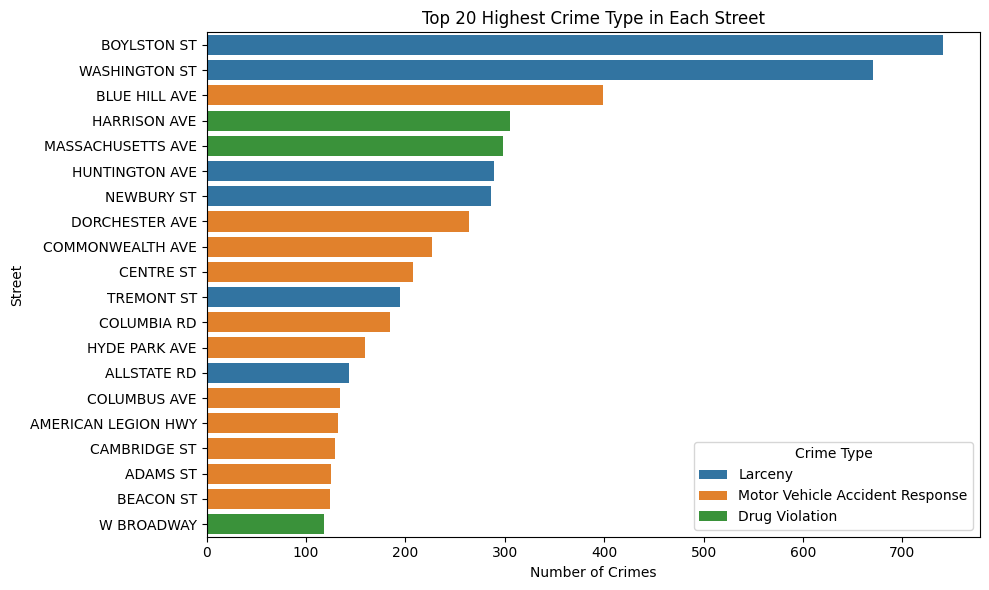

In [17]:
higest_crimetype_InStreet =  data.groupby(["STREET","OFFENSE_CODE_GROUP"]).size().reset_index(name="Count").sort_values(["STREET","Count"],ascending=[True,False])
highest_crimeType = higest_crimetype_InStreet.groupby("STREET").first().reset_index().sort_values("Count",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=highest_crimeType.head(20),x="Count",y="STREET",hue="OFFENSE_CODE_GROUP") 
plt.title("Top 20 Highest Crime Type in Each Street")
plt.xlabel("Number of Crimes")
plt.ylabel("Street")
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()

#### Highest Crime in Each Street

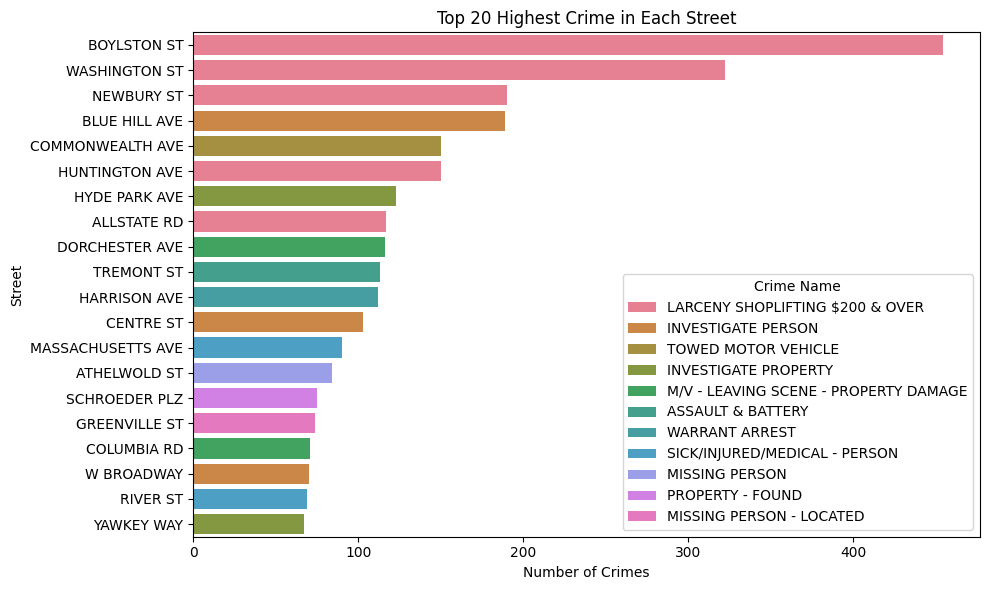

In [18]:
higest_crimetype_InStreet =  data.groupby(["STREET","NAME"]).size().reset_index(name="Count").sort_values(["STREET","Count"],ascending=[True,False])
highest_crimeType = higest_crimetype_InStreet.groupby("STREET").first().reset_index().sort_values("Count",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=highest_crimeType.head(20),x="Count",y="STREET",hue="NAME") 
plt.title("Top 20 Highest Crime in Each Street")
plt.xlabel("Number of Crimes")
plt.ylabel("Street")
plt.legend(title="Crime Name")
plt.tight_layout()
plt.show()

#### Total No of crimes committed in each Street 

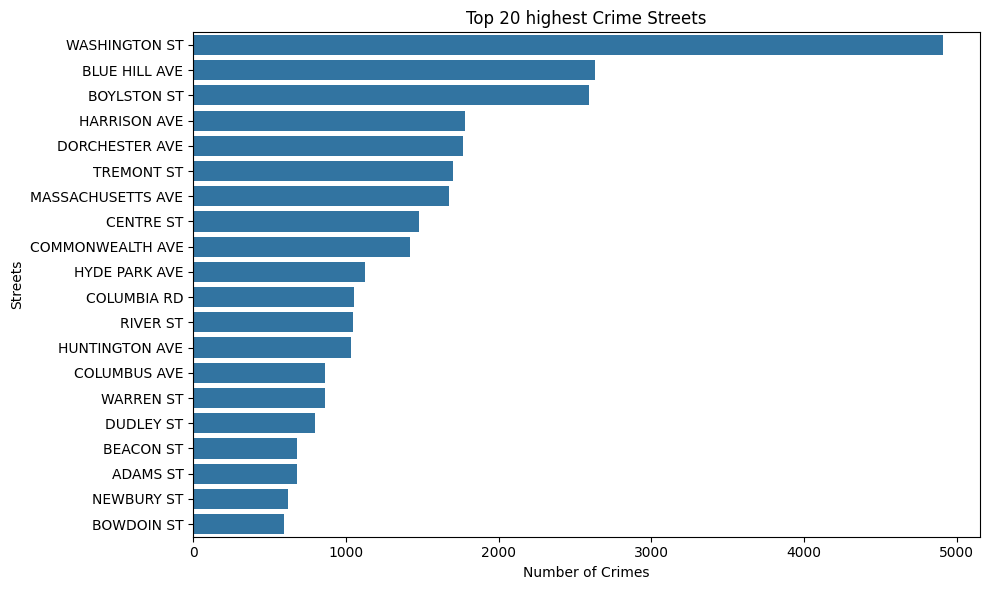

In [19]:
# Total No of crimes committed in each Street 
total_crimes_InStreet = data.groupby("STREET").size().reset_index(name="Count").sort_values("Count",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=total_crimes_InStreet.head(20),y="STREET",x="Count")
plt.title("Top 20 highest Crime Streets")
plt.xlabel("Number of Crimes")
plt.ylabel("Streets")
plt.tight_layout()
plt.show()

#### Top 20 Highest crime Types 

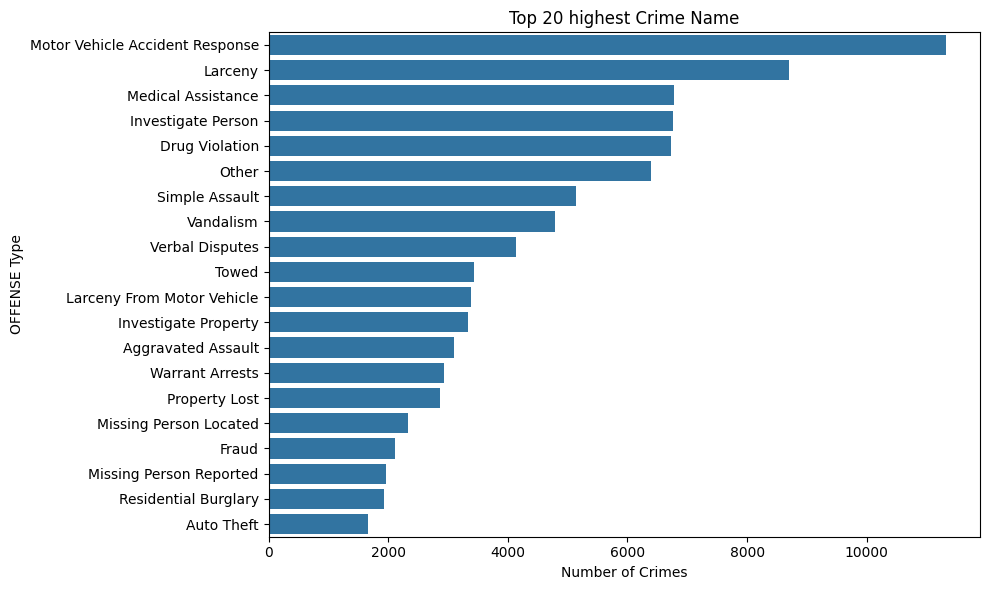

In [20]:
total_crimes_InCrimeType = data.groupby("OFFENSE_CODE_GROUP").size().reset_index(name="Count").sort_values("Count",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=total_crimes_InCrimeType.head(20),x="Count",y="OFFENSE_CODE_GROUP")
plt.title("Top 20 highest Crime Name")
plt.ylabel("OFFENSE Type")
plt.xlabel("Number of Crimes")
plt.tight_layout()
plt.show()

#### Top offense types trends over month

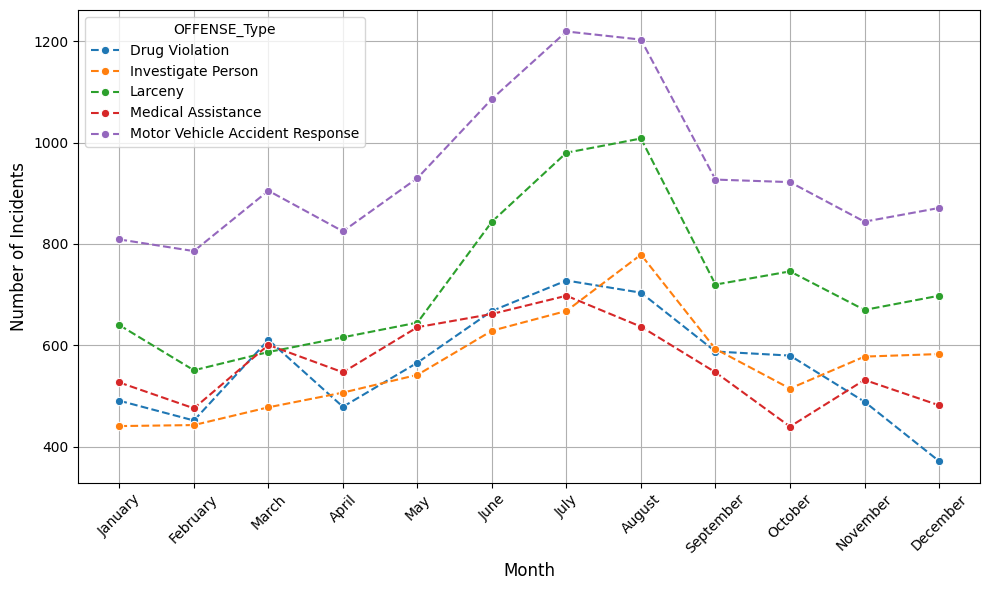

In [21]:
crimeTypeMonth = data.groupby(["OFFENSE_CODE_GROUP","Month"]).size().reset_index(name = "Count")
crimeTypeMonth = crimeTypeMonth[crimeTypeMonth["OFFENSE_CODE_GROUP"].isin(total_crimes_InCrimeType["OFFENSE_CODE_GROUP"].head(5))]

crimeTypeMonth["Month"] = pd.Categorical(crimeTypeMonth["Month"], 
                                             categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], 
                                             ordered=True)


plt.figure(figsize=(10,6))
sns.lineplot(data=crimeTypeMonth,y="Count",x="Month",hue="OFFENSE_CODE_GROUP",marker="o",linestyle="--")
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='OFFENSE_Type')
plt.tight_layout()
plt.grid()
plt.show()

#### Top 20 Highest Crimes  

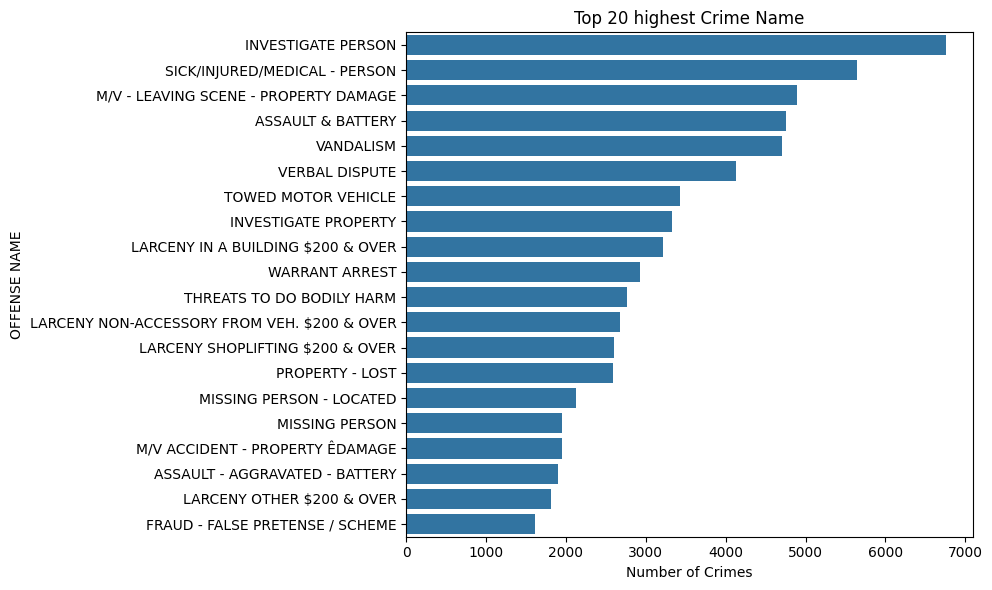

In [22]:
#Top 20 Highest Crime
total_crimes_InCrimeType = data.groupby("NAME").size().reset_index(name="Count").sort_values("Count",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=total_crimes_InCrimeType.head(20),x="Count",y="NAME")
plt.title("Top 20 highest Crime Name")
plt.ylabel("OFFENSE NAME")
plt.xlabel("Number of Crimes")
plt.tight_layout()
plt.show()

#### Multiple crimes committed by a single person

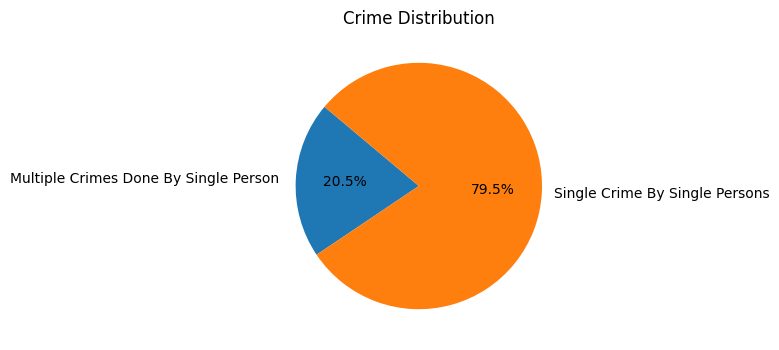

In [23]:
# multiple crimes committed by a single person
duplicated = data["INCIDENT_NUMBER"].duplicated(keep=False)

count={
    "Multiple Crimes Done By Single Person ": duplicated.sum(),
    "Single Crime By Single Persons" : (~duplicated).sum()
}

plt.figure(figsize=(4, 4))
plt.pie(count.values(), labels=count.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Crime Distribution')
plt.show()

#### Crimes committed in every Day in every Hour

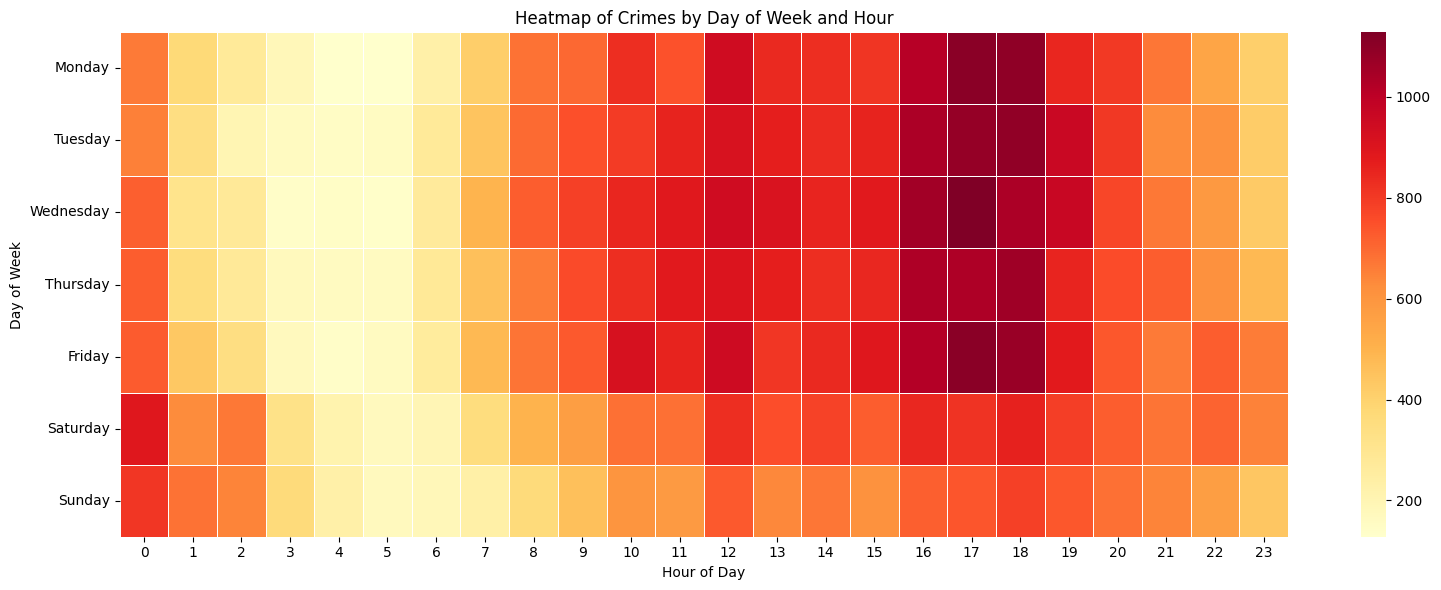

In [24]:
crimeHours = data["OCCURRED_ON_DATE"].dt.hour.to_frame(name="HourNumber")
crimeDay =  data["OCCURRED_ON_DATE"].dt.day_name().to_frame(name="DayName")

dataDayHours=pd.concat([crimeDay,crimeHours],axis=1)
crimedayhours = dataDayHours.groupby(["DayName","HourNumber"]).size().reset_index(name="Count")

crimedayhours['DayName'] = pd.Categorical(crimedayhours['DayName'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

pivotdf = crimedayhours.pivot(index='DayName', columns='HourNumber', values='Count')

plt.figure(figsize=(16, 6))
sns.heatmap(pivotdf, cmap="YlOrRd", linewidths=0.5, annot=False)
plt.title("Heatmap of Crimes by Day of Week and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

#### Crimes committed in every Month of a year

In [25]:
crimeMonth = data["OCCURRED_ON_DATE"].dt.month_name().reset_index(name="Month")
numberOfCrimesInMonth = crimeMonth.groupby("Month").size().reset_index(name="Count")
numberOfCrimesInMonth["Month"] = pd.Categorical(numberOfCrimesInMonth["Month"], 
                                             categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], 
                                             ordered=True)


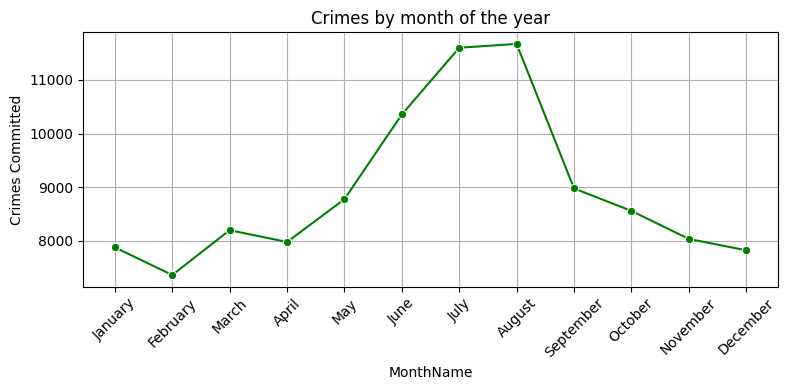

In [26]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=numberOfCrimesInMonth,y="Count", x="Month",marker="o",color="green")
plt.title("Crimes by month of the year")
plt.xlabel("MonthName")
plt.ylabel("Crimes Committed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

####  Number of crimes committed in every year

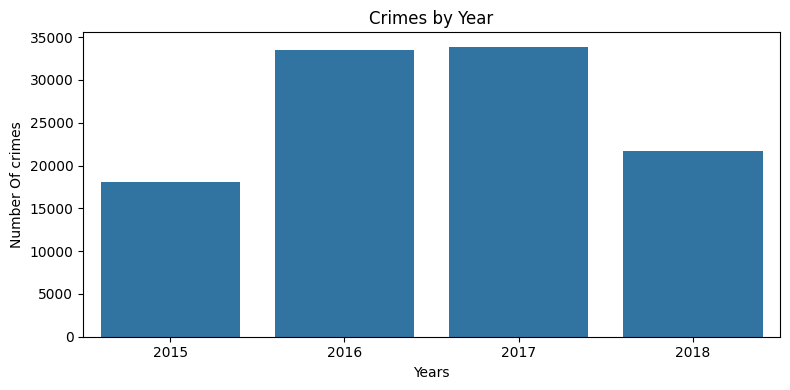

In [27]:
# Number of crimes in every year
crimeYear = data["OCCURRED_ON_DATE"].dt.year.reset_index(name="Years")
plt.figure(figsize=(8, 4))
sns.countplot(data=crimeYear,x="Years")
plt.title("Crimes by Year")
plt.ylabel("Number Of crimes")
plt.xlabel("Years")
plt.tight_layout()
plt.show()

#### Crime Distribution by Time of Day

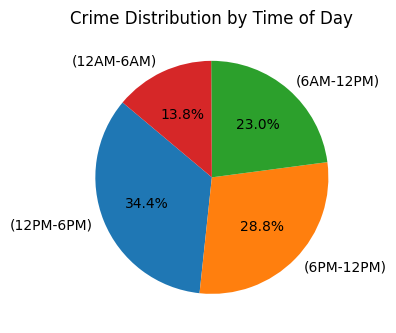

In [28]:
def get(hour):
    if 6 <= hour < 12:
        return '(6AM-12PM)'
    elif 12 <= hour < 18:
        return '(12PM-6PM)'
    elif 18 <= hour < 24:
        return '(6PM-12PM)'
    else:
        return '(12AM-6AM)'

data['Hour'] = data['OCCURRED_ON_DATE'].dt.hour
data['TimeOfDay'] = data['Hour'].apply(get)

# Group and plot pie chart
time_dist = data['TimeOfDay'].value_counts()
# Plot
plt.figure(figsize=(4, 4))
plt.pie(time_dist, labels=time_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('Crime Distribution by Time of Day')
plt.tight_layout()
plt.show()

#### Crime Location Scatter Plot By District

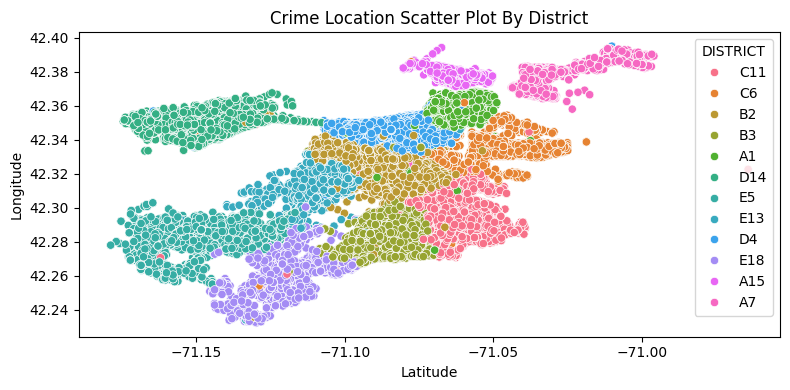

In [29]:
# Crime Location Scatter Plot By District
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data,y="Lat", x="Long" ,hue="DISTRICT")
plt.title("Crime Location Scatter Plot By District")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.tight_layout()
plt.show()

In [ ]:

# Center the map (optional: average of all points)
m = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], zoom_start=4)

# Add markers for each location
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['STREET']
    ).add_to(m)

# Show in Jupyter or save to file
m